# Petals to the Metal competition dataset

## Convert to jpg

In [1]:
import math, re, os
import numpy as np
import tensorflow as tf

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.2.0


In [2]:
# Create a dictionary describing the features.
train_feature_description = {
    'class': tf.io.FixedLenFeature([], tf.int64),
    'id': tf.io.FixedLenFeature([], tf.string),
    'image': tf.io.FixedLenFeature([], tf.string),
}

In [89]:
from tqdm.notebook import tqdm

In [108]:
def extract(out_data_dir, path):
    def _parse_image_function(example_proto):
        return tf.io.parse_single_example(example_proto, train_feature_description)
    train_ids = []
    train_class = []
    train_images = []
    for i in [path]:
        train_image_dataset = tf.data.TFRecordDataset(i)
    
    train_image_dataset = train_image_dataset.map(_parse_image_function)
    
    ids = [str(id_features['id'].numpy())[2:-1] for id_features in train_image_dataset] # [2:-1] is done to remove b' from 1st and 'from last in train id names
    train_ids = train_ids + ids
    
    classes = [int(class_features['class'].numpy()) for class_features in train_image_dataset]
    train_class = train_class + classes
    
    images = [image_features['image'].numpy() for image_features in train_image_dataset]
    train_images = train_images + images
    
    for iid, label, image in zip(train_ids, train_class, train_images):
        jpeg_image = Image.open(io.BytesIO(image))
        directory = os.path.join(out_data_dir, str(label))
        if not os.path.exists(directory):
            os.makedirs(directory)
        image_path = os.path.join(directory, iid) + ".jpg"
        jpeg_image.save(image_path)

In [73]:
import os

In [72]:
data_dir = "/mnt/pmldl"
subdirs = ["tfrecords-jpeg-192x192",  "tfrecords-jpeg-331x331",
          "tfrecords-jpeg-224x224", "tfrecords-jpeg-512x512"]

In [114]:
for subdir in subdirs:
    size_lvl = os.path.join(data_dir, subdir)
    split_lvls = os.listdir(size_lvl)
    for split_lvl in split_lvls[:-1]:
        split_dir = os.path.join(size_lvl, split_lvl)
        for tfrec in tqdm(os.listdir(split_dir)):
            tfrec_path = os.path.join(split_dir, tfrec)
            extract("/mnt/pmldl/flowers104", tfrec_path)

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

## Distribution

In [127]:
data_path = "/mnt/pmldl/flowers104"

In [133]:
os.listdir(data_path)

104

In [217]:
labels = {}
for i in range(104):
    labels[i] = len(os.listdir(os.path.join(data_path, str(i))))

In [161]:
from matplotlib import pyplot as plt
import seaborn as sns

In [212]:
sns.set(rc={'figure.figsize':(130,50)})

In [213]:
sns.set(font_scale=3)

In [174]:
keys = list(labels.keys())

In [176]:
vals = [float(val) for val in labels.values()]

<AxesSubplot:>

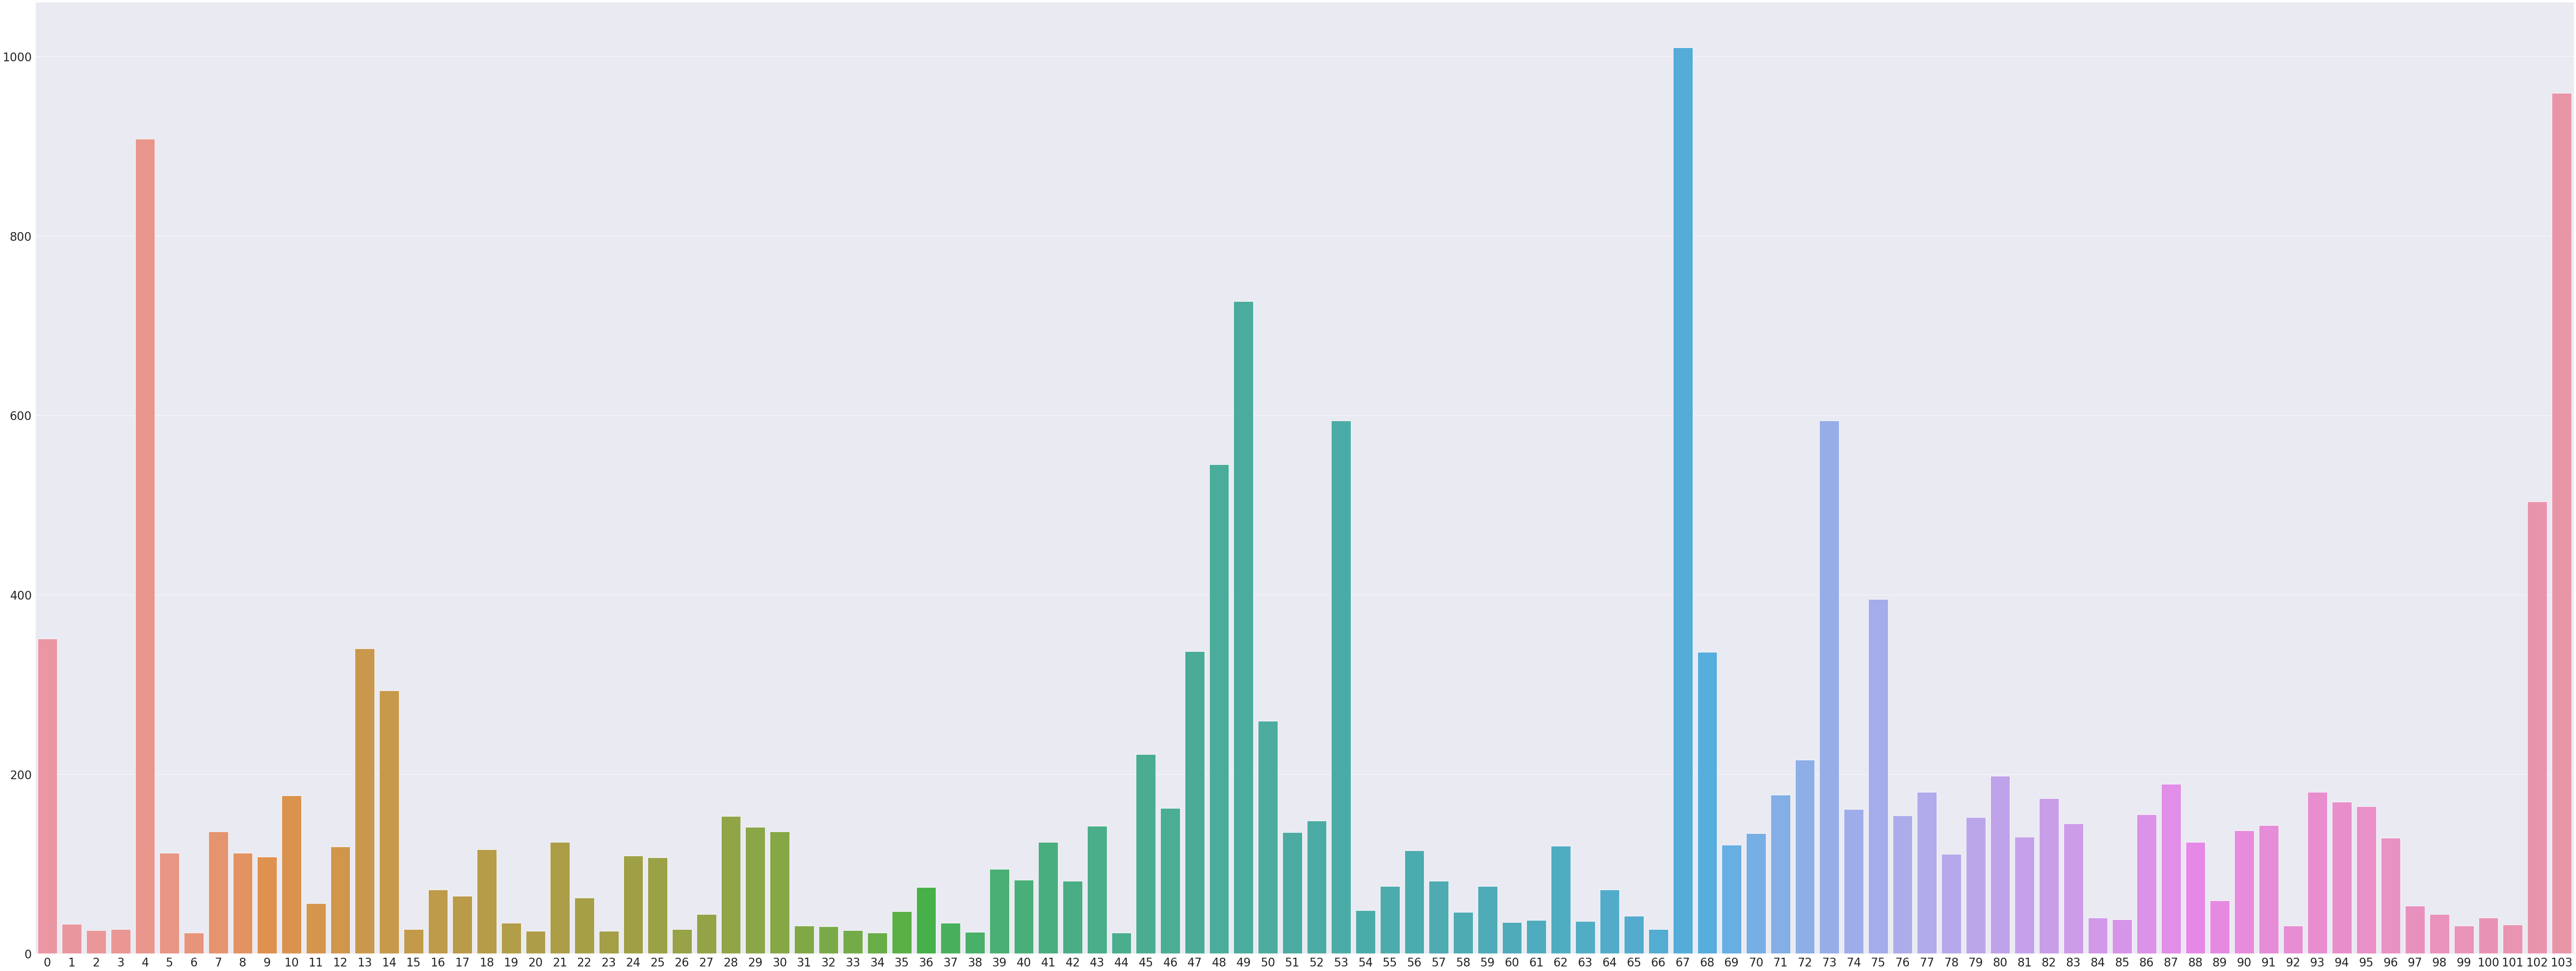

In [214]:
sns.barplot(x=keys, y=vals)

In [218]:
sum(list(labels.values()))

16465